In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("diminos_data.csv")

In [3]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [11]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

In [12]:
df['delivery_duration'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds() / 60

In [13]:
df['delivery_duration'] 

0        17.140719
1        15.598754
2        15.104856
3        38.533657
4        16.176984
           ...    
14995    15.540156
14996    16.744549
14997    15.411271
14998    15.963506
14999    15.374989
Name: delivery_duration, Length: 15000, dtype: float64

In [15]:
p95 = np.percentile(df['delivery_duration'], 95)
mean = df['delivery_duration'].mean()
median = df['delivery_duration'].median()
late_pct = (df['delivery_duration'] > 31).mean() * 100

In [16]:
print(f"Mean delivery time: {mean:.2f} mins") 
print(f"Median delivery time: {median:.2f} mins")
print(f"95th percentile delivery time: {p95:.2f} mins")
print(f"Late deliveries (>31 mins): {late_pct:.2f}%")

Mean delivery time: 20.50 mins
Median delivery time: 15.80 mins
95th percentile delivery time: 27.26 mins
Late deliveries (>31 mins): 3.71%


In [24]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at']) 
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

In [25]:
df['delivery_duration'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds() / 60

In [27]:
df['hour'] = df['order_placed_at'].dt.hour 
df['day_of_week'] = df['order_placed_at'].dt.day_name()

In [18]:
if p95 < 31: 
    print("Kanav's store meets the 95th percentile requirement!")
else:
    print("Kanav's store does NOT meet the requirement. Action needed!")

Kanav's store meets the 95th percentile requirement!


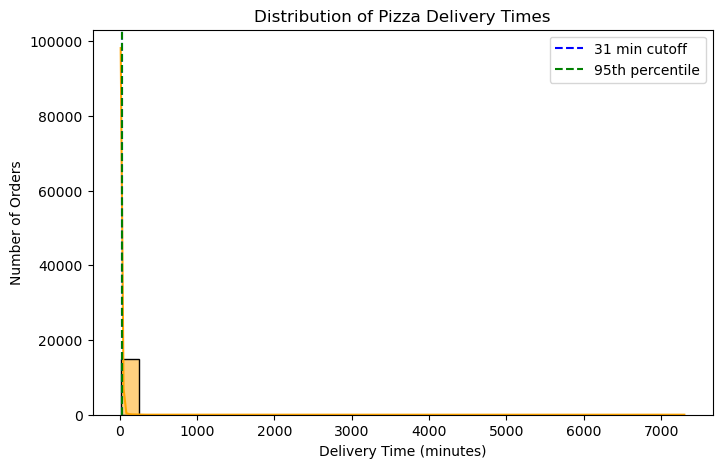

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['delivery_duration'], bins=30, kde=True, color="orange")
plt.axvline(31, color='blue', linestyle='--', label='31 min cutoff') 
plt.axvline(p95, color='green', linestyle='--', label='95th percentile') 
plt.title("Distribution of Pizza Delivery Times") 
plt.xlabel("Delivery Time (minutes)") 
plt.ylabel("Number of Orders") 
plt.legend() 
plt.show()

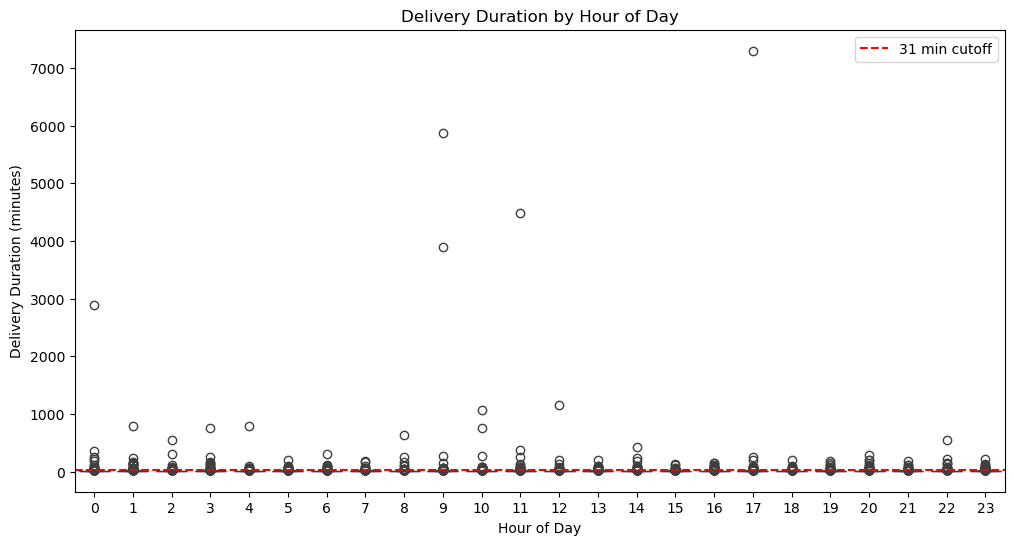

In [28]:
plt.figure(figsize=(12,6)) 
sns.boxplot(x='hour', y='delivery_duration', data=df) 
plt.axhline(31, color='red', linestyle='--', label='31 min cutoff') 
plt.title("Delivery Duration by Hour of Day") 
plt.xlabel("Hour of Day") 
plt.ylabel("Delivery Duration (minutes)") 
plt.legend() 
plt.show()

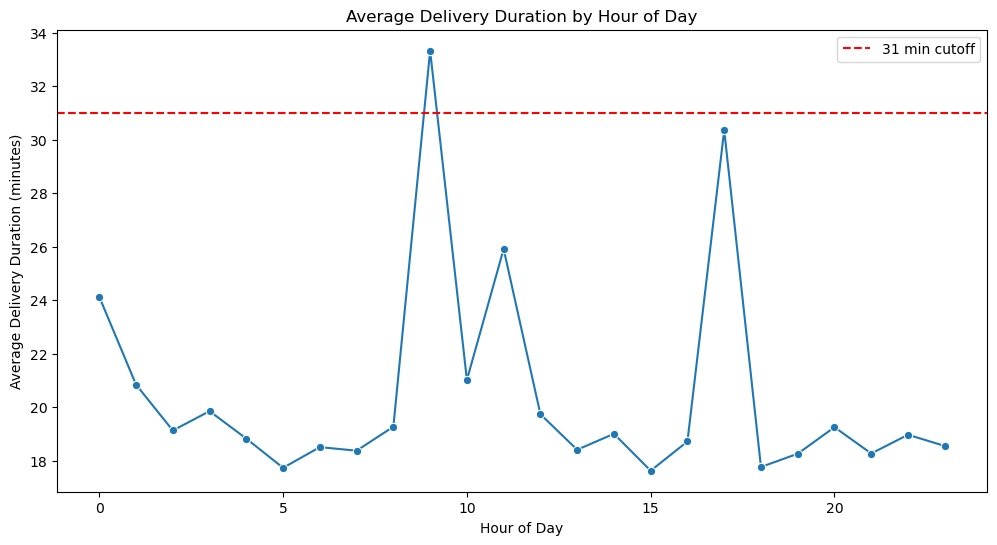

In [29]:
avg_by_hour = df.groupby('hour')['delivery_duration'].mean() 
plt.figure(figsize=(12,6)) 
sns.lineplot(x=avg_by_hour.index, y=avg_by_hour.values, marker='o') 
plt.axhline(31, color='red', linestyle='--', label='31 min cutoff') 
plt.title("Average Delivery Duration by Hour of Day") 
plt.xlabel("Hour of Day") 
plt.ylabel("Average Delivery Duration (minutes)") 
plt.legend() 
plt.show()

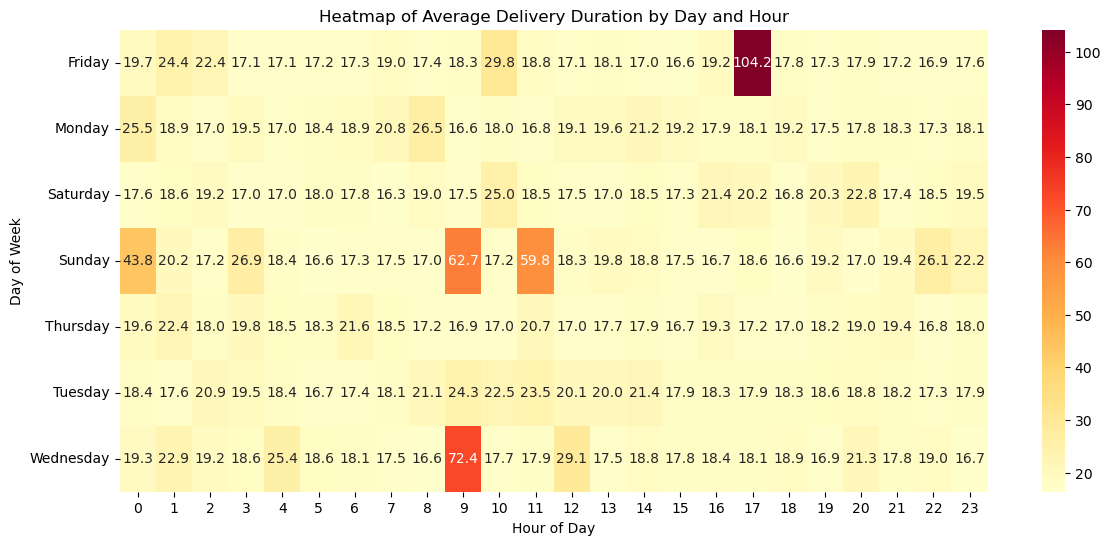

In [30]:
pivot_table = df.pivot_table(values='delivery_duration', index='day_of_week', columns='hour', aggfunc='mean') 
plt.figure(figsize=(14,6)) 
sns.heatmap(pivot_table, cmap="YlOrRd", annot=True, fmt=".1f") 
plt.title("Heatmap of Average Delivery Duration by Day and Hour") 
plt.xlabel("Hour of Day") 
plt.ylabel("Day of Week") 
plt.show()